### Using API's in Python
An API, or Application Programming Interface, is a server that you can use to retrieve and send data to using code. APIs are most commonly used to retrieve data, and that will be the focus of this tutorial

When we want to receive data from an API, we need to make a request. 

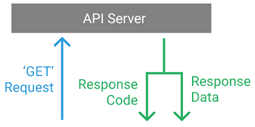

In Python, the most common library for making requests and working with APIs is the [requests library](https://2.python-requests.org/en/master/).

In [1]:
import requests

### API Requests
The most common request is GET, which is used to retrieve data. When we make a request, there is a response code which tells us if our request was successful. Response codes tell us if something went wrong.

To make a ‘GET’ request, we’ll use the requests.get() function.

In [2]:
response = requests.get("http://api.open-notify.org/this-api-doesnt-exist")

In [3]:
print(response.status_code)

404


The ‘404’ status code it’s the status code that a server returns if it can’t find the file we requested. 

### API Status Codes
* 200: Everything went okay, and the result has been returned (if any).
* 301: The server is redirecting you to a different endpoint. This can happen when a company switches domain names, or an endpoint name is changed.
* 400: The server thinks you made a bad request. This can happen when you don’t send along the right data, among other things.
* 401: The server thinks you’re not authenticated. APIs require login ccredentials, this happens when you don’t send the right credentials to access an API.
* 403: The resource you’re trying to access is forbidden: you don’t have the right permissions to see it.
* 404: The resource you tried to access wasn’t found on the server.
* 503: The server is not ready to handle the request.

visit the following [link](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status) for status codes.

### API Access and Documentation
Lets work with the [Open Notify](http://open-notify.org/) API, which gives access to data about the international space station. It’s easy to use and doesn’t require authentication.

In [4]:
response = requests.get("http://api.open-notify.org/astros.json")
print(response.status_code)

200


The documentation tells us that the API response we’ll get is in JSON format. let’s use the [response.json()](https://2.python-requests.org/en/master/user/quickstart/#json-response-content) method to see the data we received back from the API:

In [5]:
print(response.json())

{'message': 'success', 'number': 7, 'people': [{'craft': 'ISS', 'name': 'Sergey Ryzhikov'}, {'craft': 'ISS', 'name': 'Kate Rubins'}, {'craft': 'ISS', 'name': 'Sergey Kud-Sverchkov'}, {'craft': 'ISS', 'name': 'Mike Hopkins'}, {'craft': 'ISS', 'name': 'Victor Glover'}, {'craft': 'ISS', 'name': 'Shannon Walker'}, {'craft': 'ISS', 'name': 'Soichi Noguchi'}]}


### Working with JSON Data in Python
[JSON](https://www.json.org/json-en.html) (JavaScript Object Notation) is the language of APIs. JSON is a way to encode data structures that ensures that they are easily readable. JSON is the primary format in which data is passed back and forth to APIs, and most API servers will send their responses in JSON format.

The JSON output we received from the API looked like it contained Python dictionaries, lists, strings and integers. We can think of JSON as being a combination of these objects represented as strings. Let’s look at a simple example: 
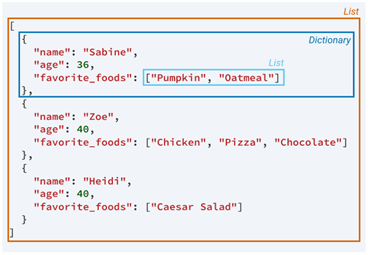

Python's [json package](https://docs.python.org/3/library/json.html) is part of the standard library. We can both convert lists and dictionaries to JSON, and convert strings to lists and dictionaries. In the case of our ISS Pass data, it is a dictionary encoded to a string in JSON format.

The json library has two main functions:

json.dumps() — Takes in a Python object, and converts (dumps) it to a string.

json.loads() — Takes a JSON string, and converts (loads) it to a Python object.

The dumps() function is particularly useful as we can use it to print a formatted string which makes it easier to understand the JSON output, like in the diagram we saw above: 

In [6]:
import json

# using custome function to print JSON output
def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

jprint(response.json())

{
    "message": "success",
    "number": 7,
    "people": [
        {
            "craft": "ISS",
            "name": "Sergey Ryzhikov"
        },
        {
            "craft": "ISS",
            "name": "Kate Rubins"
        },
        {
            "craft": "ISS",
            "name": "Sergey Kud-Sverchkov"
        },
        {
            "craft": "ISS",
            "name": "Mike Hopkins"
        },
        {
            "craft": "ISS",
            "name": "Victor Glover"
        },
        {
            "craft": "ISS",
            "name": "Shannon Walker"
        },
        {
            "craft": "ISS",
            "name": "Soichi Noguchi"
        }
    ]
}


Can obtain same result using [PrettyPrinter](https://docs.python.org/3/library/pprint.html).

In [7]:
import pprint
pprint.pprint(response.json())

{'message': 'success',
 'number': 7,
 'people': [{'craft': 'ISS', 'name': 'Sergey Ryzhikov'},
            {'craft': 'ISS', 'name': 'Kate Rubins'},
            {'craft': 'ISS', 'name': 'Sergey Kud-Sverchkov'},
            {'craft': 'ISS', 'name': 'Mike Hopkins'},
            {'craft': 'ISS', 'name': 'Victor Glover'},
            {'craft': 'ISS', 'name': 'Shannon Walker'},
            {'craft': 'ISS', 'name': 'Soichi Noguchi'}]}


We can understand the structure of the data more easily – we can see that their are six people currently in space, with their names existing as dictionaries inside a list.

If we compare this to the [documentation for the endpoint](http://open-notify.org/Open-Notify-API/People-In-Space/#json) we’ll see that this matches the specified output for the endpoint.

### Using an API with Query Parameters
The [endpoint](http://api.open-notify.org/astros.json) used earlier does not take any parameters. We just send a GET request and the API sends back data about the number of people currently in space.

It’s very common, to have an API endpoint that requires us to specify parameters. An example of this is the iss-pass [endpoint](http://api.open-notify.org/iss-pass.json). This endpoint tells us the next times that the international space station will pass over a given location on the earth. the documentation, requires lat (latitude) and long (longitude) parameters.

this can be done by adding an optional keyword argument, params, to our request. We can make a dictionary with these parameters, and then pass them into the requests.get function. Here’s what our dictionary would look like, using coordinates for Toronto: 

In [8]:
# Toronto Coordinates
parameters = {"lat": 43.6487,
              "lon": -79.38544}

Always setup the parameters as a dictionary, because requests properly formats the query parameters, and we don’t need to worry about inserting the values into the URL string.

Let’s make a request using these coordinates and see what response we get.

In [9]:
response = requests.get("http://api.open-notify.org/iss-pass.json", params=parameters)

jprint(response.json())

{
    "message": "success",
    "request": {
        "altitude": 100,
        "datetime": 1612367597,
        "latitude": 43.6487,
        "longitude": -79.38544,
        "passes": 5
    },
    "response": [
        {
            "duration": 351,
            "risetime": 1612368284
        },
        {
            "duration": 637,
            "risetime": 1612373900
        },
        {
            "duration": 644,
            "risetime": 1612379705
        },
        {
            "duration": 610,
            "risetime": 1612385570
        },
        {
            "duration": 635,
            "risetime": 1612391409
        }
    ]
}


### Understanding the Pass Times
The JSON response matches what the documentation specified:

* A dictionary with three keys
* The third key, response, contains a list of pass times
* Each pass time is a dictionary with risetime (pass start time) and duration keys.

Let’s extract the pass times from our JSON object: 

In [10]:
# pass_times, is a list of dictionaries
pass_times = response.json()['response']
jprint(pass_times)

[
    {
        "duration": 351,
        "risetime": 1612368284
    },
    {
        "duration": 637,
        "risetime": 1612373900
    },
    {
        "duration": 644,
        "risetime": 1612379705
    },
    {
        "duration": 610,
        "risetime": 1612385570
    },
    {
        "duration": 635,
        "risetime": 1612391409
    }
]


Now we can extract the five risetime values:

In [11]:
risetimes = []

for i in pass_times:
    time = i['risetime']
    risetimes.append(time)

print(risetimes)

[1612368284, 1612373900, 1612379705, 1612385570, 1612391409]


These times are difficult to understand – they are in a format known as timestamp or epoch. The time is measured in the number of seconds since January 1st 1970. We can use the Python [datetime.fromtimestamp()](https://docs.python.org/3/library/datetime.html#datetime.date.fromtimestamp) method to convert these into easier to understand times:

In [12]:
from datetime import datetime

times = []

for i in risetimes:
    time = datetime.fromtimestamp(i)
    times.append(time)
    print(time)

2021-02-03 11:04:44
2021-02-03 12:38:20
2021-02-03 14:15:05
2021-02-03 15:52:50
2021-02-03 17:30:09


It looks like the ISS passes over Toronto often – five times within a six hour!